### Importação das bibliotecas

In [99]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#Biblioteca para ignorar mensagens de warning (aviso) ao rodar uma célula de código
import warnings
warnings.filterwarnings('ignore')

### Carregando os dados 

In [100]:
# importação da base de dados
dados = pd.read_csv('precos_carros_brasil.csv')
#exibindo as primeiras linhas
dados.head()

,year_of_reference,month_of_reference,fipe_code,authentication,brand,model,fuel,gear,engine_size,year_model,avg_price_brl
0,2021.0,January,004001-0,cfzlctzfwrcp,GM - Chevrolet,Corsa Wind 1.0 MPFI / EFI 2p,Gasoline,manual,1,2002.0,9162.0
1,2021.0,January,004001-0,cdqwxwpw3y2p,GM - Chevrolet,Corsa Wind 1.0 MPFI / EFI 2p,Gasoline,manual,1,2001.0,8832.0
2,2021.0,January,004001-0,cb1t3xwwj1xp,GM - Chevrolet,Corsa Wind 1.0 MPFI / EFI 2p,Gasoline,manual,1,2000.0,8388.0
3,2021.0,January,004001-0,cb9gct6j65r0,GM - Chevrolet,Corsa Wind 1.0 MPFI / EFI 2p,Alcohol,manual,1,2000.0,8453.0
4,2021.0,January,004003-7,g15wg0gbz1fx,GM - Chevrolet,Corsa Pick-Up GL/ Champ 1.6 MPFI / EFI,Gasoline,manual,"1,6",2001.0,12525.0


##### Remover a coluna "authentication" pôs este dado não será relevante, uma vez que ele é usado para autenticação no site da tabela File

In [101]:
dados.drop('authentication', axis=1, inplace=True)
dados.head()

,year_of_reference,month_of_reference,fipe_code,brand,model,fuel,gear,engine_size,year_model,avg_price_brl
0,2021.0,January,004001-0,GM - Chevrolet,Corsa Wind 1.0 MPFI / EFI 2p,Gasoline,manual,1,2002.0,9162.0
1,2021.0,January,004001-0,GM - Chevrolet,Corsa Wind 1.0 MPFI / EFI 2p,Gasoline,manual,1,2001.0,8832.0
2,2021.0,January,004001-0,GM - Chevrolet,Corsa Wind 1.0 MPFI / EFI 2p,Gasoline,manual,1,2000.0,8388.0
3,2021.0,January,004001-0,GM - Chevrolet,Corsa Wind 1.0 MPFI / EFI 2p,Alcohol,manual,1,2000.0,8453.0
4,2021.0,January,004003-7,GM - Chevrolet,Corsa Pick-Up GL/ Champ 1.6 MPFI / EFI,Gasoline,manual,"1,6",2001.0,12525.0


##### Verificar se ha dados invalidas

In [102]:
### Verificar se há valores nulos
dados.isna()

,year_of_reference,month_of_reference,fipe_code,brand,model,fuel,gear,engine_size,year_model,avg_price_brl
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
267537,True,True,True,True,True,True,True,True,True,True
267538,True,True,True,True,True,True,True,True,True,True
267539,True,True,True,True,True,True,True,True,True,True
267540,True,True,True,True,True,True,True,True,True,True


##### Identificadas muitas linhas sem dados, estas linhas serão removidas. 

In [103]:
# Removendo linhas vazias
dados = dados.dropna()
# Verificando se existema mais alguma linha faltando dados
dados.isna().sum()

year_of_reference     0
month_of_reference    0
fipe_code             0
brand                 0
model                 0
fuel                  0
gear                  0
engine_size           0
year_model            0
avg_price_brl         0
dtype: int64

In [104]:
dados.head()

,year_of_reference,month_of_reference,fipe_code,brand,model,fuel,gear,engine_size,year_model,avg_price_brl
0,2021.0,January,004001-0,GM - Chevrolet,Corsa Wind 1.0 MPFI / EFI 2p,Gasoline,manual,1,2002.0,9162.0
1,2021.0,January,004001-0,GM - Chevrolet,Corsa Wind 1.0 MPFI / EFI 2p,Gasoline,manual,1,2001.0,8832.0
2,2021.0,January,004001-0,GM - Chevrolet,Corsa Wind 1.0 MPFI / EFI 2p,Gasoline,manual,1,2000.0,8388.0
3,2021.0,January,004001-0,GM - Chevrolet,Corsa Wind 1.0 MPFI / EFI 2p,Alcohol,manual,1,2000.0,8453.0
4,2021.0,January,004003-7,GM - Chevrolet,Corsa Pick-Up GL/ Champ 1.6 MPFI / EFI,Gasoline,manual,"1,6",2001.0,12525.0


##### Verificando se há dados duplicados

In [105]:
dados.duplicated().any()

np.True_

##### Removendo dados duplicados

In [106]:
dados.drop_duplicates(inplace=True)
dados.duplicated().any()

np.False_

##### Separando colunas numéricas de categóricas

In [107]:
dados.dtypes
numericas = dados.select_dtypes(include=['float64', 'int64'])
categoricas = dados.select_dtypes(include=['object'])

##### Resumo das variáveis numéricas

In [108]:
numericas.describe()

,year_of_reference,year_model,avg_price_brl
count,202295.000000,202295.000000,202295.000000
mean,2021.564695,2011.271514,52756.765713
std,0.571904,6.376241,51628.912116
min,2021.000000,2000.000000,6647.000000
25%,2021.000000,2006.000000,22855.000000
50%,2022.000000,2012.000000,38027.000000
75%,2022.000000,2016.000000,64064.000000
max,2023.000000,2023.000000,979358.000000


##### Resumo das variáveis categóricas

In [109]:
categoricas.describe()

,month_of_reference,fipe_code,brand,model,fuel,gear,engine_size
count,202295,202295,202295,202295,202295,202295,202295
unique,12,2091,6,2112,3,2,29
top,January,001216-5,Fiat,Palio Week. Adv/Adv TRYON 1.8 mpi Flex,Gasoline,manual,"1,6"
freq,24260,425,44962,425,168684,161883,47420


##### Imprimindo a contagem de valores por modelo e marca do carro

In [110]:
dados[['brand','model']].value_counts()

brand            model                                 
Fiat             Palio Week. Adv/Adv TRYON 1.8 mpi Flex    425
Ford             Focus 1.6 S/SE/SE Plus Flex 8V/16V 5p     425
VW - VolksWagen  Saveiro 1.6 Mi/ 1.6 Mi Total Flex 8V      400
Ford             Focus 2.0 16V/SE/SE Plus Flex 5p Aut.     400
GM - Chevrolet   Corvette 5.7/ 6.0, 6.2 Targa/Stingray     375
                                                          ... 
VW - VolksWagen  Polo Track 1.0 Flex 12V 5p                  2
Renault          STEPWAY Zen Flex 1.0 12V Mec.               2
VW - VolksWagen  Saveiro Robust 1.6 Total Flex 16V CD        2
                 Gol Last Edition 1.0 Flex 12V 5p            2
Nissan           KICKS Active 1.6 16V Flex Aut.              2
Name: count, Length: 2112, dtype: int64

#### Conclusão:
##### Após a análise exploratória, removemos registros vazios e duplicados, resultando em um conjunto de dados limpo e consistente. As colunas numéricas e categóricas foram separadas para facilitar a análise. Observamos que a base de dados contém informações detalhadas sobre preços de carros no Brasil, com uma variedade de marcas e modelos.


##### Gráfico da distribuição da quantidade de carros por marca

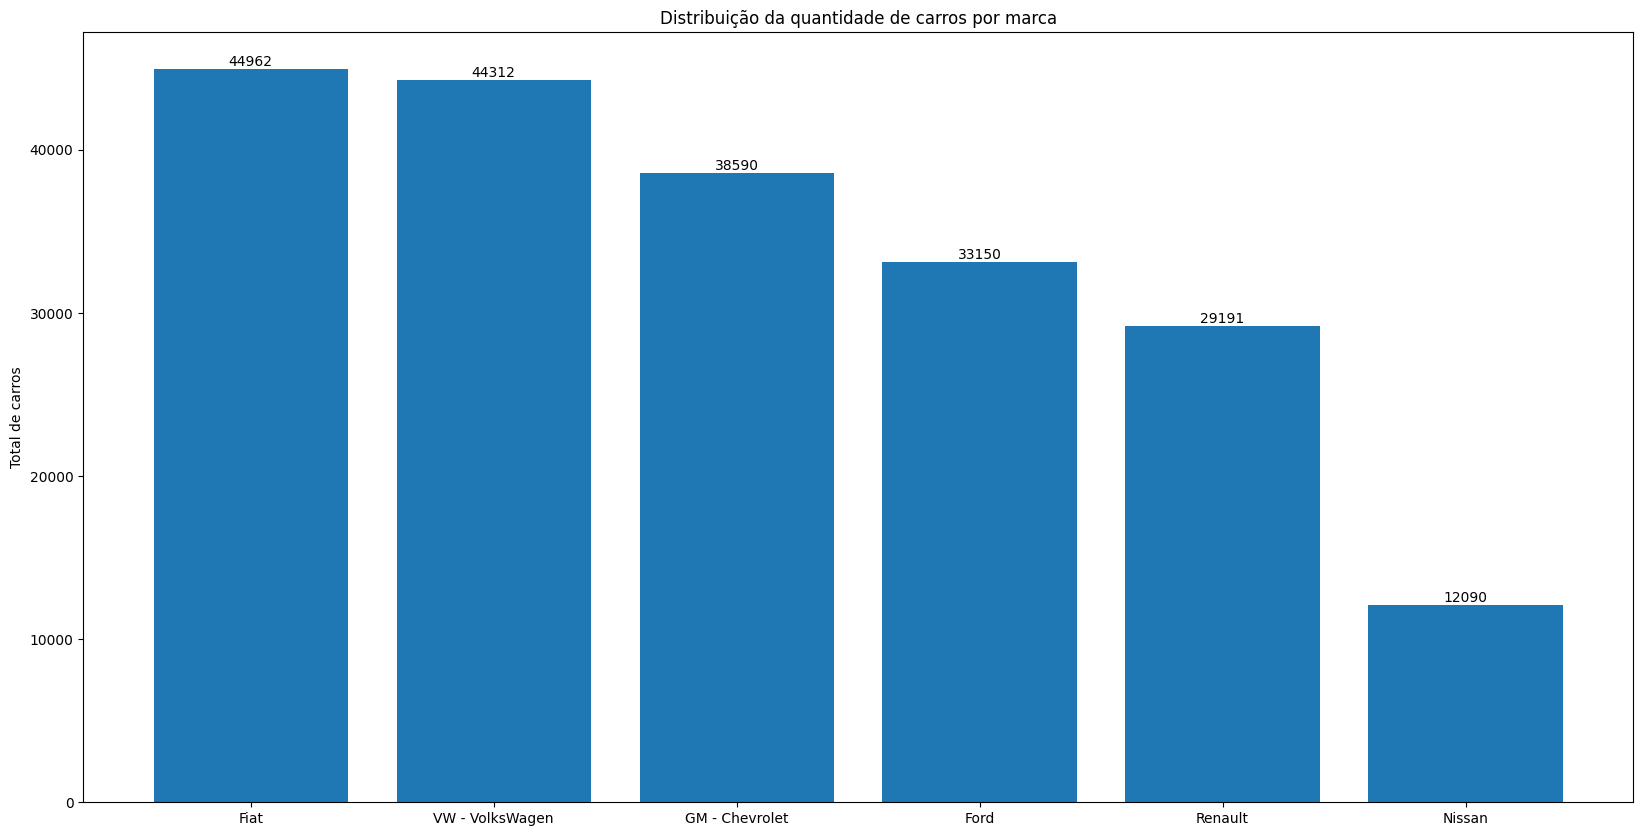

In [144]:
marcas = dados['brand'].value_counts().sort_values(ascending=False)
# Gráfico da distribuição da quantidade de carros por marca
plt.figure(figsize=(20,10)) # Aumentar o tamanho da figura na saída dos dados
grafico_qtd_branch = plt.bar(marcas.index, marcas.values) # Variavel Nivel Ensino no eixo X
plt.title('Distribuição da quantidade de carros por marca') # plt.title para inserir título no gráfico
plt.ylabel('Total de carros'); # # plt.ylabel para inserir título no gráfico
plt.bar_label(grafico_qtd_branch, size=10);

##### Gráfico da distribuição da quantidade de carros por tipo de engrenagem do carro

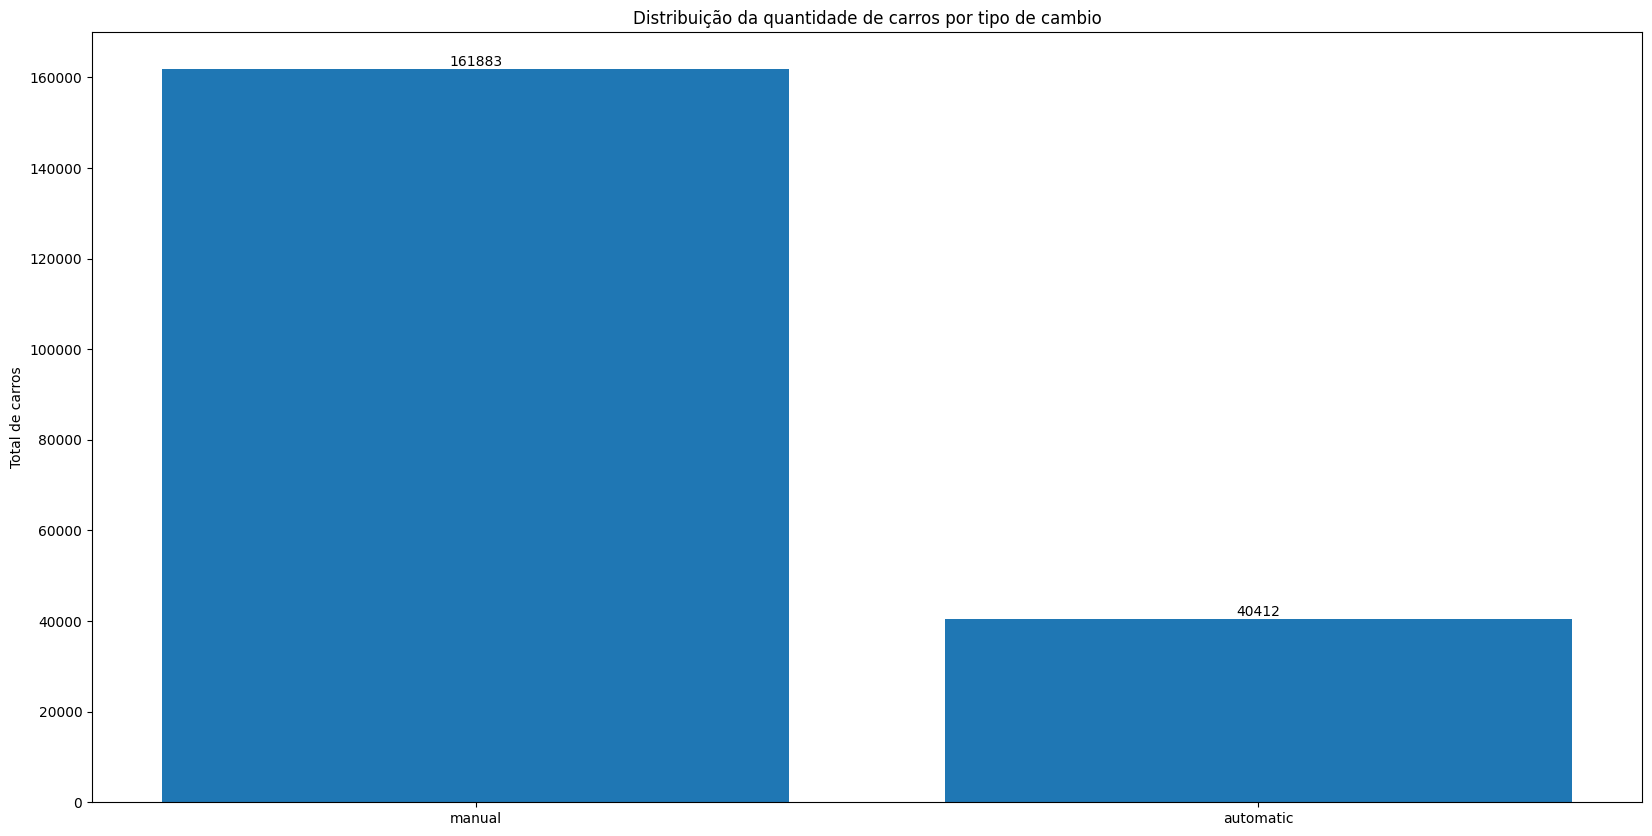

In [145]:
marcas = dados['gear'].value_counts().sort_values(ascending=False)
# Gráfico da distribuição da quantidade de carros por tipo de cambio
plt.figure(figsize=(20,10)) # Aumentar o tamanho da figura na saída dos dados
grafico_engines = plt.bar(marcas.index, marcas.values) # Variavel Nivel Ensino no eixo X
plt.title('Distribuição da quantidade de carros por tipo de cambio') # plt.title para inserir título no gráfico
plt.ylabel('Total de carros'); # # plt.ylabel para inserir título no gráfico
plt.bar_label(grafico_engines, size=10);

##### Gráfico da evolução da média de preço dos carros ao longo dos meses de 2022 (variável de tempo no eixo X)

In [146]:
# Criar um dicionário mapeando os meses para números
meses_ordem = {
    'January': 1, 'February': 2, 'March': 3, 'April': 4,
    'May': 5, 'June': 6, 'July': 7, 'August': 8,
    'September': 9, 'October': 10, 'November': 11, 'December': 12
}
# Adicionar os números correspondentes como índice auxiliar e reordenar corretamente
data_mean_price = (dados.where(dados['year_of_reference'] == 2022).dropna().groupby('month_of_reference')['avg_price_brl']
    .mean().rename_axis('month_of_reference')  # Garante que o índice tem nome correto
    .reset_index())  # Transforma em DataFrame para manipular

# Criar uma nova coluna numérica para ordenar corretamente
data_mean_price['month_number'] = data_mean_price['month_of_reference'].map(meses_ordem)

# Ordenar pelos números dos meses e restaurar o índice original
data_mean_price = (data_mean_price.sort_values(by='month_number')
    .drop(columns=['month_number'])  # Remover a coluna auxiliar
    .set_index('month_of_reference')  # Restaurar índice original
)
data_mean_price

,avg_price_brl
month_of_reference,
January,54840.270037
February,55824.519882
March,56848.951914
April,57150.037325
May,57799.763776
June,58065.611398
July,57893.997056
August,57923.544105
September,58198.936989


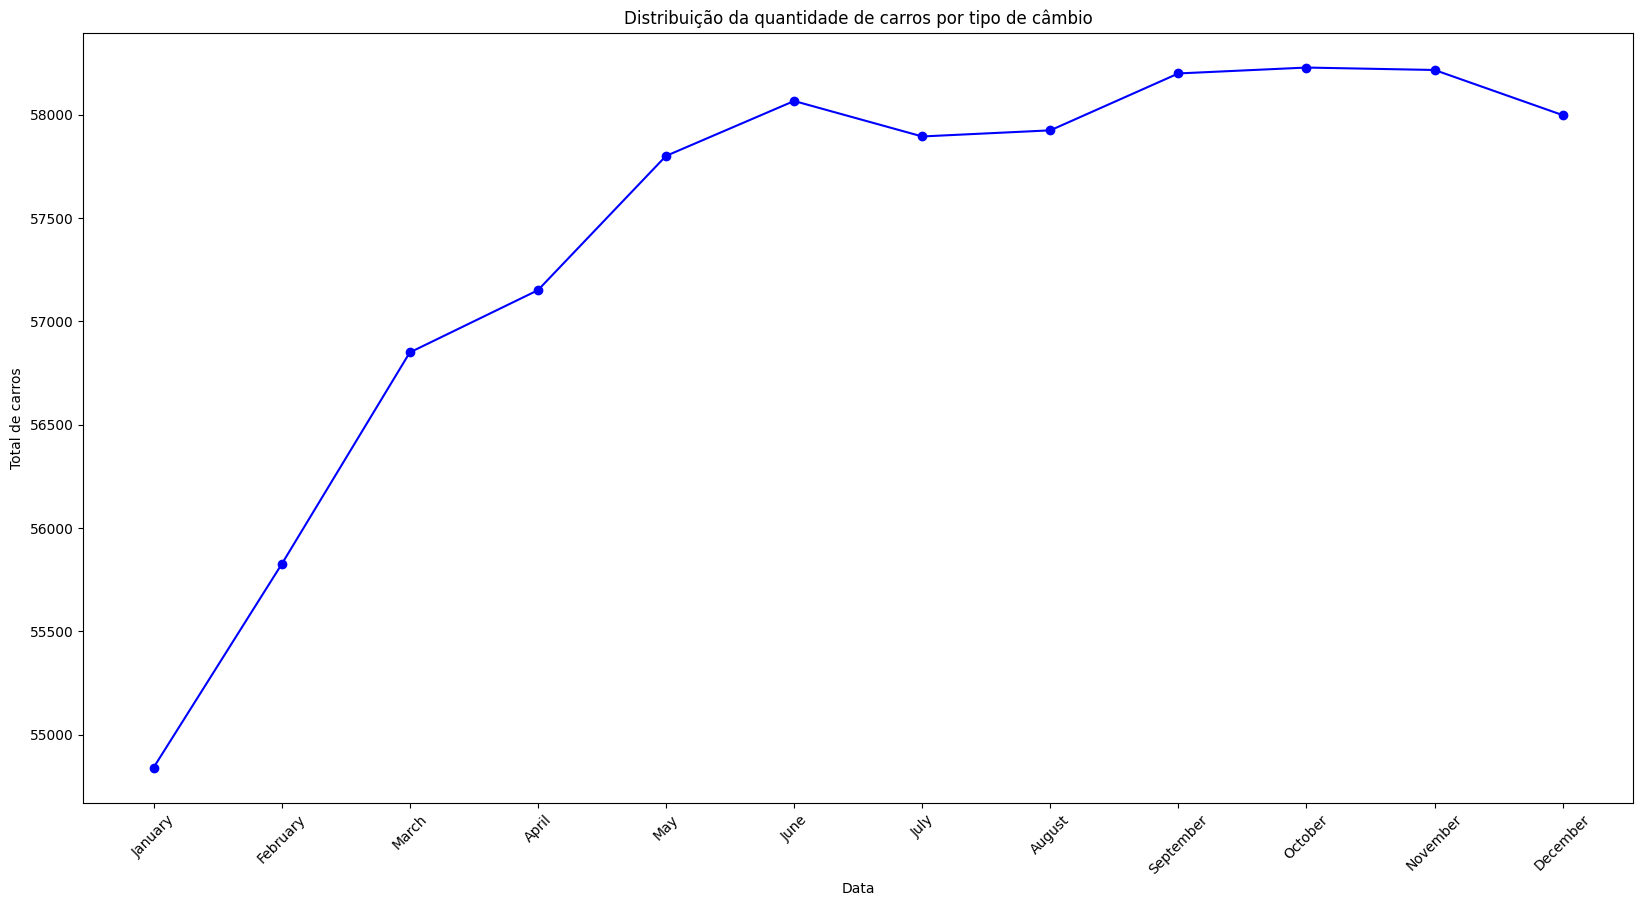

In [147]:
# Gráfico da distribuição da evolução média dos preços dos carros por mês no ano de 2022
plt.figure(figsize=(20,10))  # Aumentar o tamanho da figura

# Criar o gráfico de linha temporal
plt.plot(data_mean_price.index, data_mean_price.values, marker='o', linestyle='-', color='b')

# Adicionar título e rótulos
plt.title('Distribuição da quantidade de carros por tipo de câmbio')  
plt.xlabel('Data')  
plt.ylabel('Total de carros')

# Melhorar a visualização do eixo X (caso o índice seja uma data)
plt.xticks(rotation=45)  
plt.show()


##### Gráfico da distribuição da média de preço dos carros por marca e tipo de engrenagem

In [ ]:
# extração de dados
data_price_fuel = dados.groupby(['brand','gear'])['avg_price_brl'].mean().round(2)
data_price_fuel = pd.DataFrame(data_price_fuel).reset_index()
data_price_fuel = data_price_fuel.sort_values(by='brand')
data_price_fuel.head()


,brand,gear,avg_price_brl
0,Fiat,automatic,97396.80
1,Fiat,manual,39694.44
2,Ford,automatic,84769.11
3,Ford,manual,51784.33
4,GM - Chevrolet,automatic,88156.92


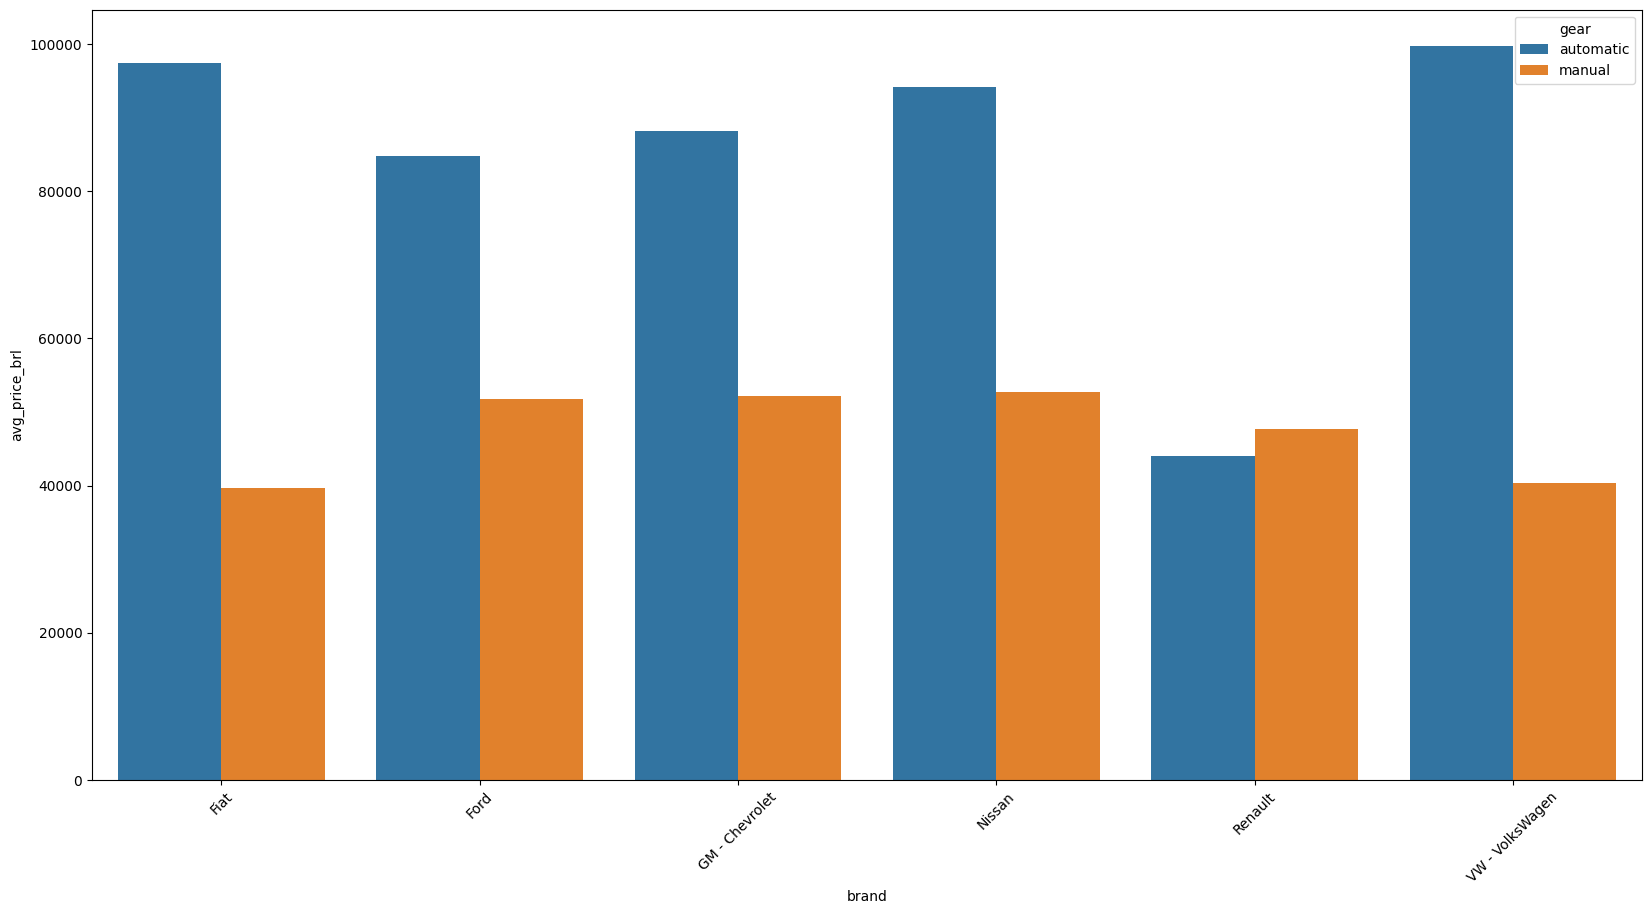

In [ ]:
# Gráfico da distribuição da média de preços dos carros por marca e tipo de cambio
plt.figure(figsize=(20,10))  
sns.barplot(x='brand', y='avg_price_brl', hue='gear', data=data_price_fuel, hue_order=['automatic', 'manual'])
plt.xticks(rotation=45)  # Rotaciona os rótulos para melhor visualização
plt.show()

###### O gráfico da distribuição da média de preço dos carros por marca e tipo de engrenagem mostra a variação dos preços médios entre diferentes marcas e tipos de câmbio (manual e automático). Observa-se que, em geral, carros com câmbio automático tendem a ter preços médios mais elevados em comparação aos carros com câmbio manual. A marca VW - VolksWagen apresenta a maior diferença de preço entre os tipos de câmbio.

#### Gráfico da distribuição da média de preço dos carros por marca e tipo de combustível

In [151]:
data_price_fuel = dados.groupby(['brand','fuel'])['avg_price_brl'].mean().round(2)
data_price_fuel = pd.DataFrame(data_price_fuel).reset_index()
data_price_fuel = data_price_fuel.sort_values(by='brand')
data_price_fuel.head()

,brand,fuel,avg_price_brl
0,Fiat,Alcohol,11509.51
1,Fiat,Diesel,99814.45
2,Fiat,Gasoline,37197.29
3,Ford,Alcohol,10148.91
4,Ford,Diesel,94525.53


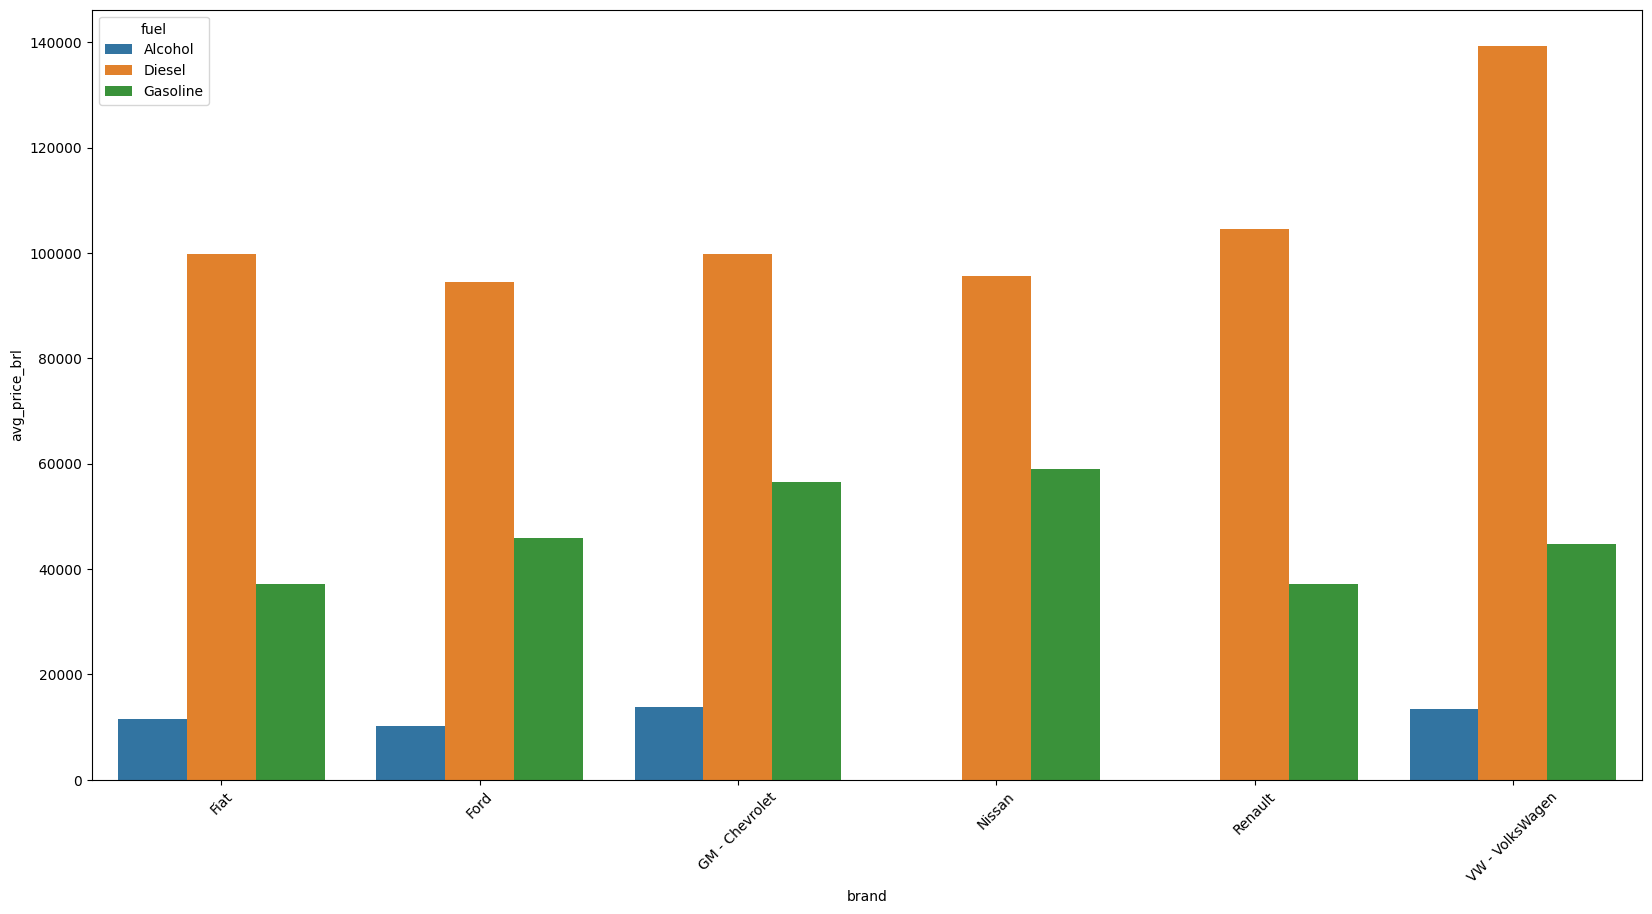

In [152]:
plt.figure(figsize=(20,10))  
sns.barplot(x='brand', y='avg_price_brl', hue='fuel', data=data_price_fuel, hue_order=['Alcohol', 'Diesel','Gasoline'])
plt.xticks(rotation=45)  # Rotaciona os rótulos para melhor visualização
plt.show()

###### O gráfico da distribuição da média de preço dos carros por marca e tipo de combustível mostra a variação dos preços médios entre diferentes marcas e tipos de combustível (álcool, diesel e gasolina). Observa-se que, em geral, carros movidos a diesel tendem a ter preços médios mais elevados em comparação aos carros movidos a álcool e gasolina. A marca VW - VolksWagen apresenta a maior diferença de preço entre os tipos de combustível, com os carros a diesel sendo significativamente mais caros. Este gráfico é útil para identificar tendências de preços com base no tipo de combustível utilizado pelos veículos.